In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv("KS_train_data.csv", delimiter=',') 
test = pd.read_csv("KS_test_data.csv", delimiter=';')

In [32]:
data['funded'].value_counts()

True     58454
False    41546
Name: funded, dtype: int64

<AxesSubplot:>

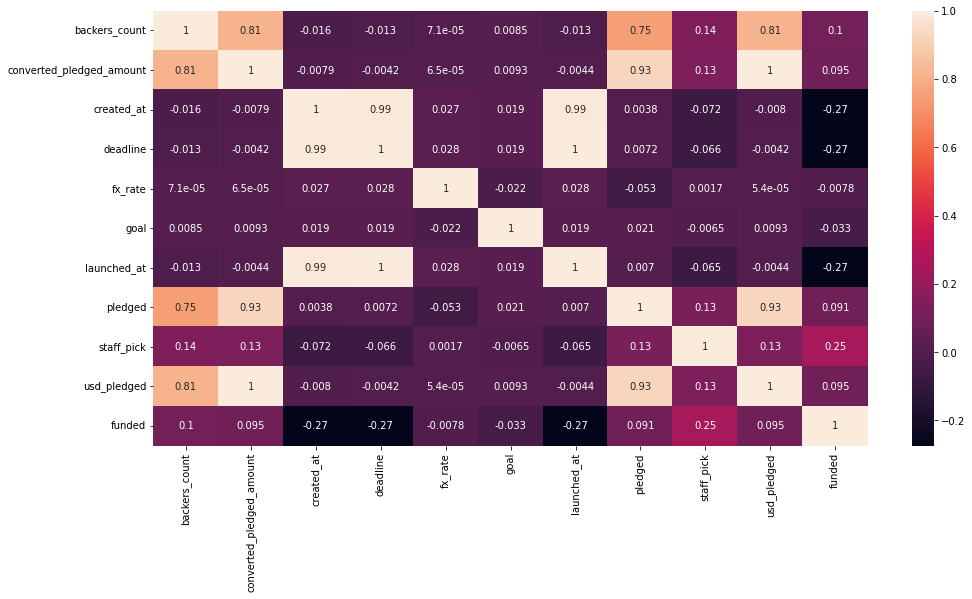

In [34]:
corrmat = data.corr()

sns.heatmap(corrmat, annot=True)

In [59]:
# data['category'].value_counts()
# data['category'].value_counts().music
data['Prob_score'] = data['funded']

# data.groupby(["category", "funded"]).size()
index = 0
for row in data.category:
    if index == 0:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)]) 
    elif row != category:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)])
    data['Prob_score'][index] = true_values / total_values
    index += 1


# len(data[(data.category == 'music') & (data.funded == True)])

# counter = 0
# for row in data.index:
#     if data[row]['category'] == 'music' and data[row]['funded'] == True:
#         counter += 1

# print(counter)

In [61]:
#here 2 possible outliers can be seen at the top
# data.nlargest(15,['converted_pledged_amount'] )
data.head(1000)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url,Prob_score
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.000000,2800.00,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...,0.558767
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.000000,4500.00,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...,0.558767
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.000000,5000.00,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...,0.558767
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.000000,6500.00,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...,0.558767
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.000000,15000.00,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...,0.558767
5,KS_000005,18,Source Material is 2 person exhibition of the ...,art,2190,US,1331239703,USD,1336090320,1.000000,600.00,1333017856,Source Material: Works by Brian Dupont and Chr...,2190.00,False,2190.000000,"Houston, TX",True,painting,https://www.kickstarter.com/projects/973860748...,https://www.kickstarter.com/projects/973860748...,0.558767
6,KS_000006,156,An anthropological field study of the Dwarven ...,art,5429,US,1332802530,USD,1334030340,1.000000,2000.00,1333045464,A Book of Dwarves,5429.95,False,5429.950000,"Chicago, IL",True,art,https://www.kickstarter.com/projects/136757708...,https://www.kickstarter.com/projects/136757708...,0.558767
7,KS_000007,479,Portrait artist seeks funds to kickstart an ex...,art,62736,US,1331325438,USD,1335671940,1.000000,10000.00,1332822807,Drawing a Drawing 365,62736.01,True,62736.010000,"New Britain, CT",True,painting,https://www.kickstarter.com/projects/michaelsh...,https://www.kickstarter.com/projects/michaelsh...,0.558767
8,KS_000008,41,This is a month long Residency at the The Verm...,art,2930,US,1331904129,USD,1336736610,1.000000,2800.00,1332848610,The Vermont Studio Center Artist Residency Pro...,2930.00,True,2930.000000,"Johnson, VT",True,painting,https://www.kickstarter.com/projects/106325273...,https://www.kickstarter.com/projects/106325273...,0.558767
9,KS_000009,25,"Art, Music, and Theater live on the Waterfront...",art,5001,US,1330979179,USD,1335443088,1.000000,5000.00,1332851088,Arts on the Waterfront,5001.00,False,5001.000000,"Seattle, WA",True,public art,https://www.kickstarter.com/projects/139851890...,https://www.kickstarter.com/projects/139851890...,0.558767
